In [1]:
!pip install --upgrade numpy
!pip uninstall -y catboost
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 738.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 40.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.27.1 requires numpy<2,>=1.17.0, but you have numpy 2.2.4 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
langchain 0.3.19 requires numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC  #supprot vector model
from sklearn.naive_bayes import GaussianNB  #naive bayes model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression  #logistic Regression model
from sklearn.metrics import recall_score,accuracy_score, precision_score,f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier  #KNN model
from sklearn.tree import DecisionTreeClassifier, plot_tree  #decisiion tree model
from sklearn.ensemble import RandomForestClassifier  #Random Forest classifier model
import joblib
import os
from google.colab import files


In [6]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
# Display first few rows
print(f"✅ File 'Cardiovascular_Disease_Dataset.csv' loaded successfully!")
print(df.head())


✅ File 'Cardiovascular_Disease_Dataset.csv' loaded successfully!
   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3      

In [7]:
# Check for missing values
print(df.isnull().sum())

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


In [8]:
# Understanding the data distribution and class balance.
print(df.describe())  # Summary statistics for numerical features

          patientid         age       gender    chestpain    restingBP  \
count  1.000000e+03  1000.00000  1000.000000  1000.000000  1000.000000   
mean   5.048704e+06    49.24200     0.765000     0.980000   151.747000   
std    2.895905e+06    17.86473     0.424211     0.953157    29.965228   
min    1.033680e+05    20.00000     0.000000     0.000000    94.000000   
25%    2.536440e+06    34.00000     1.000000     0.000000   129.000000   
50%    4.952508e+06    49.00000     1.000000     1.000000   147.000000   
75%    7.681877e+06    64.25000     1.000000     2.000000   181.000000   
max    9.990855e+06    80.00000     1.000000     3.000000   200.000000   

       serumcholestrol  fastingbloodsugar  restingrelectro  maxheartrate  \
count      1000.000000        1000.000000      1000.000000   1000.000000   
mean        311.447000           0.296000         0.748000    145.477000   
std         132.443801           0.456719         0.770123     34.190268   
min           0.000000       

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB
None


In [10]:
# Class balance (for the target variable)
print(df['target'].value_counts())

target
1    580
0    420
Name: count, dtype: int64


<ipython-input-11-78a3574f5122>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df,palette='viridis')


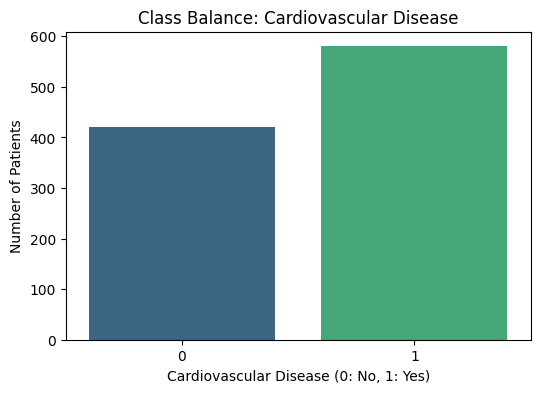

In [11]:
# Visualize class balance
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df,palette='viridis')
plt.title('Class Balance: Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Number of Patients')
plt.show()

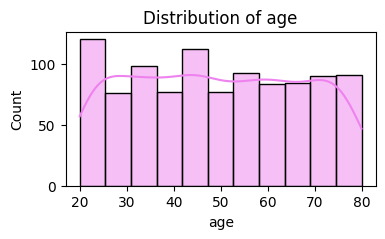

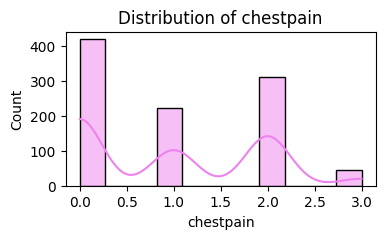

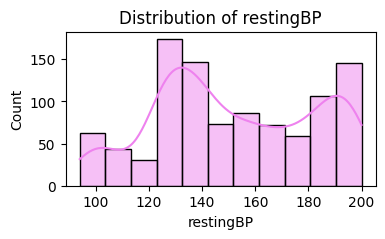

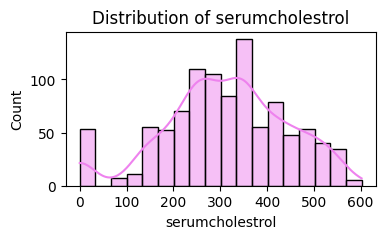

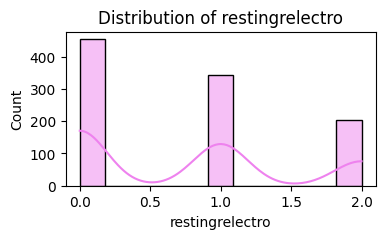

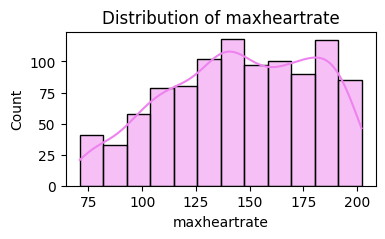

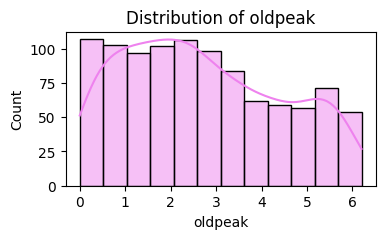

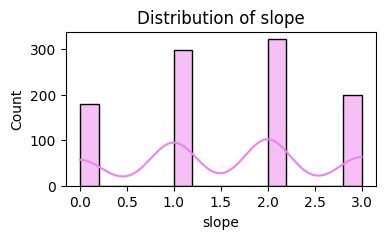

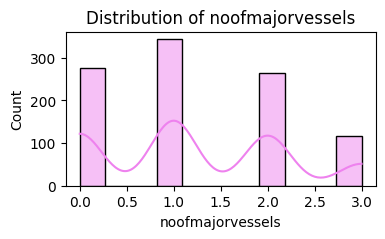

In [12]:
# Histograms for numerical features
numerical_features = ['age', 'chestpain','restingBP','serumcholestrol','restingrelectro',
                     'maxheartrate','oldpeak', 'slope','noofmajorvessels']
for col in numerical_features:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[col], kde=True,color='violet')
    plt.title(f'Distribution of {col}')
    plt.show()

In [13]:
# Outlier Detection and Handling
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Applying outlier removal to specific columns
for col in ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']:
    data = remove_outliers_iqr(df, col)

print(df.shape) #check the number of rows after outlier removal

(1000, 14)


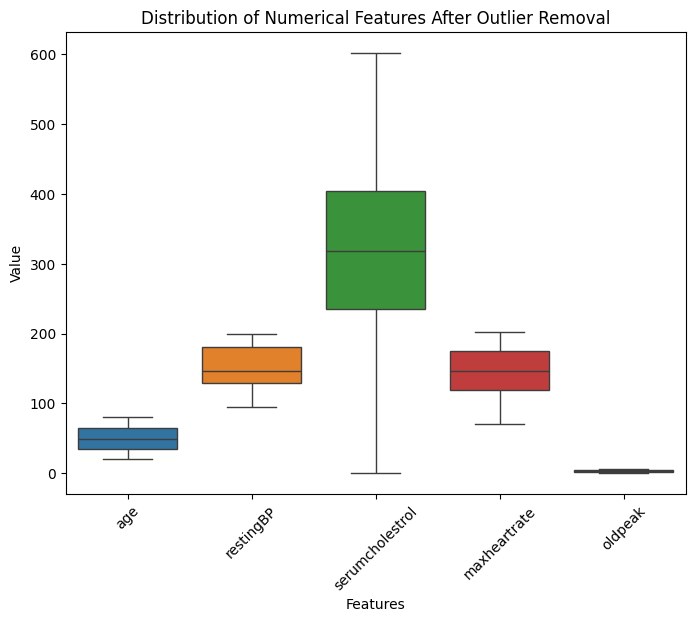

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the columns for boxplot visualization
columns_for_boxplot = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[columns_for_boxplot])
plt.title('Distribution of Numerical Features After Outlier Removal')
plt.ylabel('Value')
plt.xlabel('Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

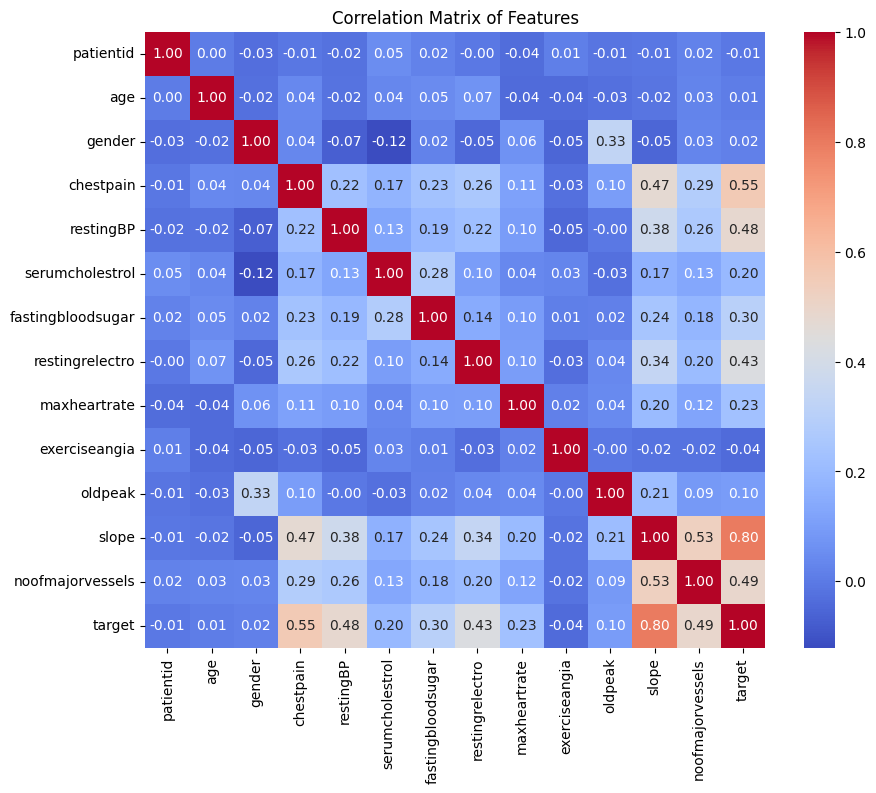

In [15]:
# Correlation matrix

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# 2. PREPROCESS THE DATA
# Encode categorical variables (if any)
# Pairplot for selected features along with target variable
# Split the dataset into training and testing sets.



categorical_cols = [col for col in df.columns if df[col].nunique() < 5 and col != 'target']

# One-hot encode categorical features
if len(categorical_cols) > 0:
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
    print("Categorical features encoded successfully")
else:
    print("No categorical features found in the dataset.")

Categorical features encoded successfully


In [16]:
#Pairplot for selected features along with target variable
sns.pairplot(df, hue="target", diag_kind="kde", markers=["o", "s"])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
# Fit and transform the numerical features
from sklearn.model_selection import train_test_split

X = data.drop(columns=['target'])  # All columns except target
y = data['target']  # Target column

# Split the data into training and testing sets (70% train,10% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)  # 10% validation

# Print dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (700, 13) (700,)
Testing set shape: (200, 13) (200,)


In [19]:
# Perform 10-fold cross-validation for all models before fitting
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier  # Import CatBoostClassifier
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0, random_seed=42)
}

X = df.drop(columns=["target"])  # Replace 'target' with actual target column name
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')  # 10-fold cross-validation
    results[name] = {"Mean Accuracy": scores.mean(), "Standard Deviation": scores.std()}
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std Dev = {scores.std():.4f}")

import pprint
pprint.pprint(results)

Logistic Regression: Mean Accuracy = 0.9670, Std Dev = 0.0190
KNN: Mean Accuracy = 0.9410, Std Dev = 0.0243
SVM: Mean Accuracy = 0.9670, Std Dev = 0.0179
Naive Bayes: Mean Accuracy = 0.9470, Std Dev = 0.0241
Decision Tree: Mean Accuracy = 0.9630, Std Dev = 0.0142
Random Forest: Mean Accuracy = 0.9770, Std Dev = 0.0155
Gradient Boosting: Mean Accuracy = 0.9820, Std Dev = 0.0117
CatBoost: Mean Accuracy = 0.9840, Std Dev = 0.0120
{'CatBoost': {'Mean Accuracy': 0.984,
              'Standard Deviation': 0.012000000000000012},
 'Decision Tree': {'Mean Accuracy': 0.9629999999999999,
                   'Standard Deviation': 0.014177446878757837},
 'Gradient Boosting': {'Mean Accuracy': 0.982,
                       'Standard Deviation': 0.011661903789690613},
 'KNN': {'Mean Accuracy': 0.9409999999999998,
         'Standard Deviation': 0.024269322199023172},
 'Logistic Regression': {'Mean Accuracy': 0.9670000000000002,
                         'Standard Deviation': 0.019000000000000017},
 'Nai

In [20]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Before applying cross_val_score, ensure X_train_scaled has the same number of samples as y_train
scaler = StandardScaler() # Initialize the scaler
X_train_scaled = scaler.fit_transform(X_train) # Scale training data
X_test_scaled = scaler.transform(X_test)  # Scale test data

# Now, X_train_scaled and y_train should have the same number of samples
cv_scores_gb = cross_val_score(gb_model, X_train_scaled, y_train, cv=10)

gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("Cross-validation scores (Gradient Boosting):", cv_scores_gb)

Gradient Boosting Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        86
           1       0.97      0.98      0.98       114

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Cross-validation scores (Gradient Boosting): [1.         0.94285714 0.94285714 0.98571429 0.91428571 1.
 1.         0.97142857 0.94285714 0.97142857]


In [21]:
# Categorical Boosting Classifier (CatBoost)
from catboost import CatBoostClassifier  # Import CatBoostClassifier
from sklearn.model_selection import cross_val_score # Import cross_val_score

cb_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_seed=42)
cv_scores_cb = cross_val_score(cb_model, X_train, y_train, cv=10)  # No need to scale for CatBoost
cb_model.fit(X_train, y_train)
y_pred_cb = cb_model.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cb))
print(classification_report(y_test, y_pred_cb))
print("Cross-validation scores (CatBoost):", cv_scores_cb)

CatBoost Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        86
           1       0.98      0.96      0.97       114

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Cross-validation scores (CatBoost): [0.98571429 0.94285714 0.95714286 0.97142857 0.91428571 1.
 1.         0.97142857 0.95714286 0.98571429]


Predictions for the test set:
[1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1
 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0]


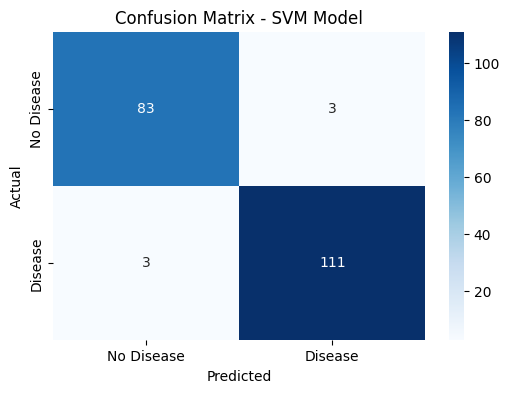

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Tuned Model Accuracy: 0.96


['svm_CVD.pkl']

In [22]:
"""# ***TESTING VARIOUS MODELS ON THE PREPROCESSED DATA***

# ***SVM***
"""

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training using the RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=10)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

print("Predictions for the test set:")
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Model')
plt.show()

from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialising SVM model
svm = SVC()

# Performing grid search
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

best_svm = grid_search.best_estimator_

# Evaluation on test data
y_pred_best = best_svm.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Tuned Model Accuracy: {accuracy_best:.2f}')
# I wrote .2f above to round off the accuracy to 2 decimal places using f-string

import joblib

joblib.dump(svm_model, 'svm_CVD.pkl')

Predictions for the test set:
[0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1
 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0]

Model Evaluation Metrics:
Accuracy: 0.9650
Recall: 0.9737

Confusion Matrix:
[[ 82   4]
 [  3 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        86
           1       0.97      0.97      0.97       114

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



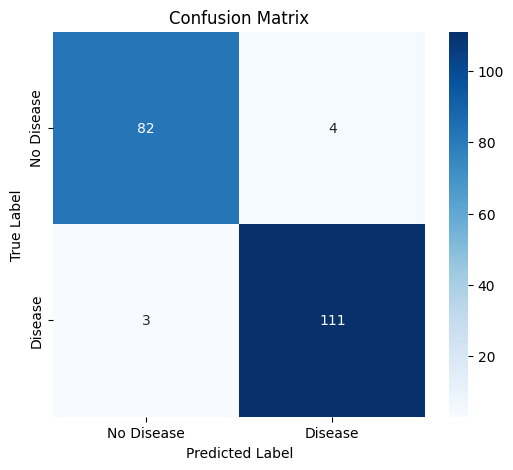

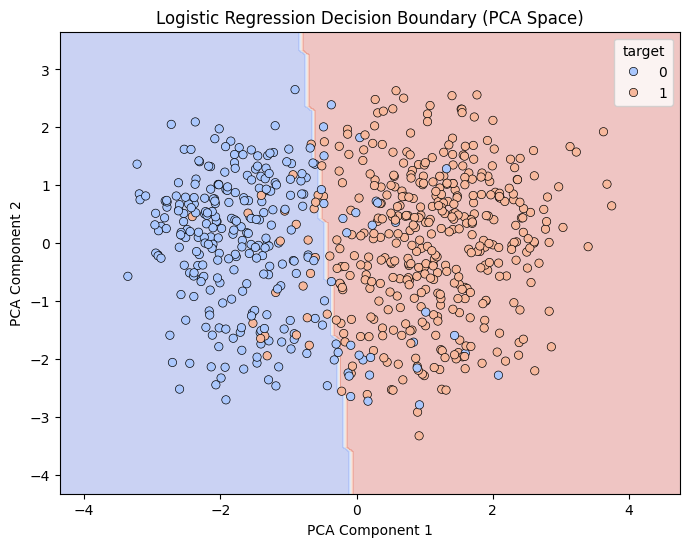

In [23]:
"""# ***LOGISTIC REGRESSION***"""

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

#  Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Print the predictions (0 or 1)
print("Predictions for the test set:")
print(y_pred)

#  Compute and display evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#  Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)  # Transform training data
X_test_pca = pca.transform(X_test_scaled)  # Transform test data

#  Train the Logistic Regression model on the PCA-transformed data
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)  # Train on PCA-transformed data

#  Create a mesh grid for decision boundary visualization
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

#  Predict on the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]  # Flatten mesh grid
Z = model_pca.predict(mesh_points)  # Predict using the PCA-trained model
Z = Z.reshape(xx.shape)  # Reshape for plotting

#  Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")  # Decision boundary
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="coolwarm", edgecolor="k")  # Data points
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Logistic Regression Decision Boundary (PCA Space)")
plt.savefig("decision_boundary_pca.png")
plt.show()


Model Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        86
           1       0.97      0.99      0.98       114

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200


Confusion Matrix:
[[ 83   3]
 [  1 113]]


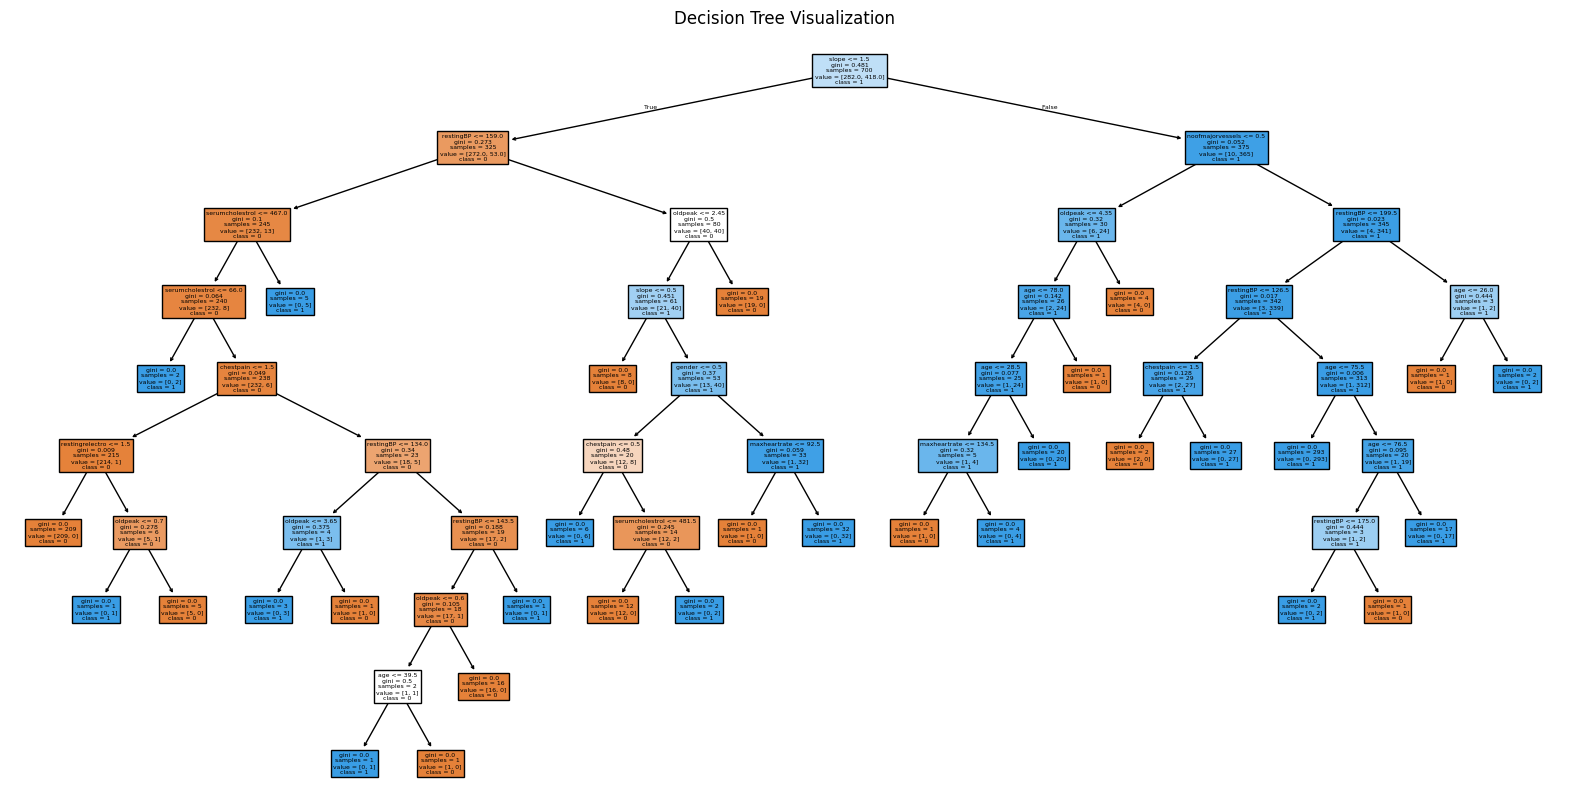


Predictions on Test Data:
     Actual  Predicted
904       0          0
543       0          0
139       0          0
526       0          0
868       0          0

Predicted Disease for Human Input: 1


In [24]:
"""# ***DECISION TREE***"""

#  Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)  # Create a Decision Tree classifier
model.fit(X_train, y_train)  # Train the model on the training data

#  Evaluate the model
y_pred = model.predict(X_test)  # Predict on the test data

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#  Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(i) for i in model.classes_])
plt.title("Decision Tree Visualization")
plt.show()

#  Predict disease based on test data
print("\nPredictions on Test Data:")
test_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(test_predictions.head())

#  Running the pipeline and predicting based on human input
def predict_disease(input_data):
    """
    Predicts the disease based on user input.
    input_data: A dictionary or list of feature values in the same order as the training data.
    """
    # Convert input data to a DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Predict using the trained model
    prediction = model.predict(input_df)
    return prediction[0]

# Example: Predict based on human input
# Replace the values below with actual feature values from your dataset
human_input = {
    'feature1': 1.0,  # Replace with actual value
    'feature2': 0.5,  # Replace with actual value
    'feature3': 0.7,  # Replace with actual value
    # Add all other features here...
}

# Predict disease
predicted_disease = predict_disease(human_input)
print("\nPredicted Disease for Human Input:", predicted_disease)

Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97        86
           1       0.97      0.98      0.98       114

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200


Confusion Matrix:
 [[ 83   3]
 [  2 112]]


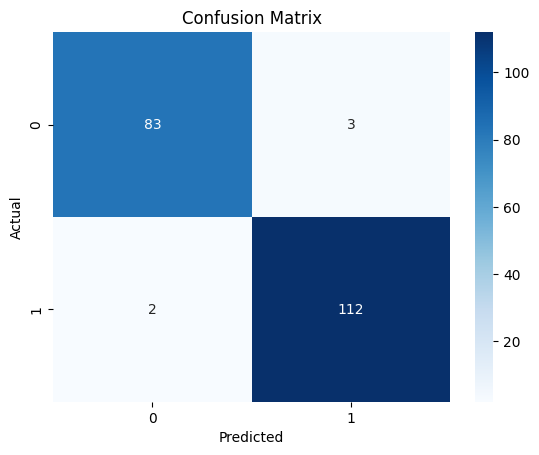

Prediction for the new patient: [1]
The model predicts that the new patient has cardiovascular disease.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [26]:
"""# ***NAIVE BAYES***"""

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  TRAIN THE MODEL
# Instantiate a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model using the training data
model.fit(X_train, y_train)

#  EVALUATE THE MODEL
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# further visualize the confusion matrix using seaborn:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  predict a new patient's data

new_patient_data = {
    'age': 60,
    'gender': 1,  # Assuming 'male
    'chestpain': 1,
    'restingBP': 140,
    'serumcholestrol': 200,
    'fastingbloodsugar': 0,
    'restingrelectro': 0,
    'maxheartrate': 120,
    'exerciseangia': 1,
    'oldpeak': 1.5,
    'slope': 1,
    'noofmajorvessels': 0,
}

# Create a DataFrame for the new patient's data
new_patient_df = pd.DataFrame([new_patient_data])
# Define or retrieve the list of categorical columns
categorical_cols = [col for col in X.columns if X[col].nunique() < 5 and col != 'target']
# Preprocess the new patient's data
# 1. Encode categorical variables (if necessary)
if len(categorical_cols) > 0:
    new_patient_df = pd.get_dummies(new_patient_df, columns=categorical_cols, drop_first=True)
    # Align columns with the training data (add missing columns with 0s)
    missing_cols = set(X.columns) - set(new_patient_df.columns)
    for c in missing_cols:
        new_patient_df[c] = 0
    # Reorder columns to match X_train
    new_patient_df = new_patient_df[X.columns]


# 2. Standardize the numerical features
new_patient_scaled = scaler.transform(new_patient_df)

# 3. Make the prediction
prediction = model.predict(new_patient_scaled)

# 4. Print the prediction
print("Prediction for the new patient:", prediction)
if prediction[0] == 1:
  print("The model predicts that the new patient has cardiovascular disease.")
else:
  print("The model predicts that the new patient does not have cardiovascular disease.")

Accuracy: 0.93
Confusion Matrix:
[[ 80   6]
 [  8 106]]


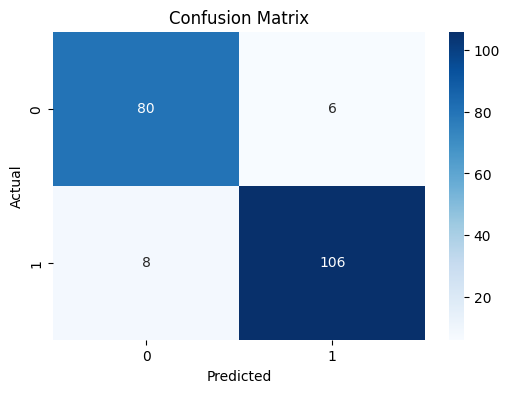

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        86
           1       0.95      0.93      0.94       114

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



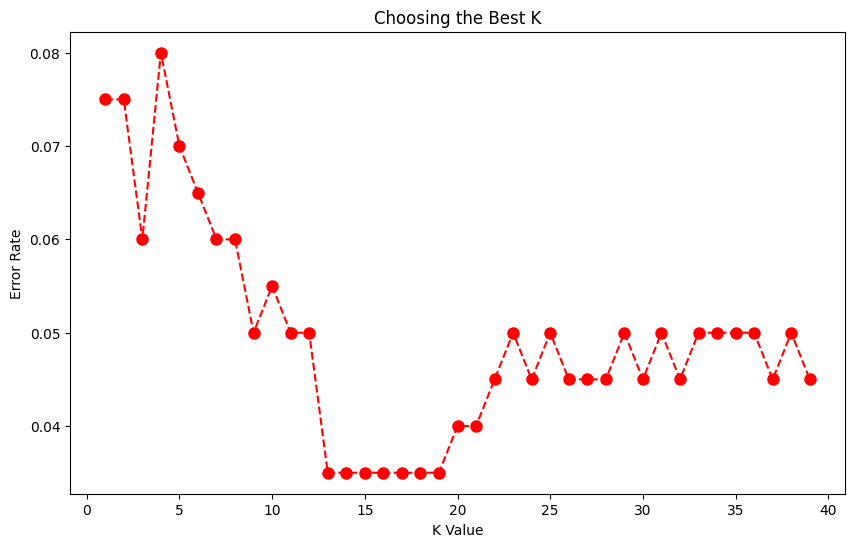

Error Rate: 0.06999999999999995
Predicted Disease: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [43]:
"""# ***KNN***"""

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Start with k=5
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(6, 4))  # Visualization
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Error rate analysis
error_rates = []
k_values = range(1, 40)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred_k)
    error_rates.append(error_rate)

# Plot Error Rate vs K Value
plt.figure(figsize=(10,6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', markersize=8, color='r')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Choosing the Best K')
plt.show()

# Ensure the model is trained before making predictions
if not hasattr(knn, "classes_"):
    knn.fit(X_train, y_train)  # Fit the model if not already trained

# Predicting Disease for a New Patient
new_patient = np.array([[45, 1, 130, 85, 250, 1, 0, 0, 120, 1, 0, 0, 1]])

# Convert to DataFrame with correct feature names
new_patient_df = pd.DataFrame(new_patient, columns=[f'feature_{i}' for i in range(new_patient.shape[1])])

# Error rate analysis
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Scale the new patient data
new_patient_scaled = scaler.transform(new_patient_df)

# Predict the disease
predicted_disease = knn.predict(new_patient_scaled)
print(f'Predicted Disease: {predicted_disease[0]}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


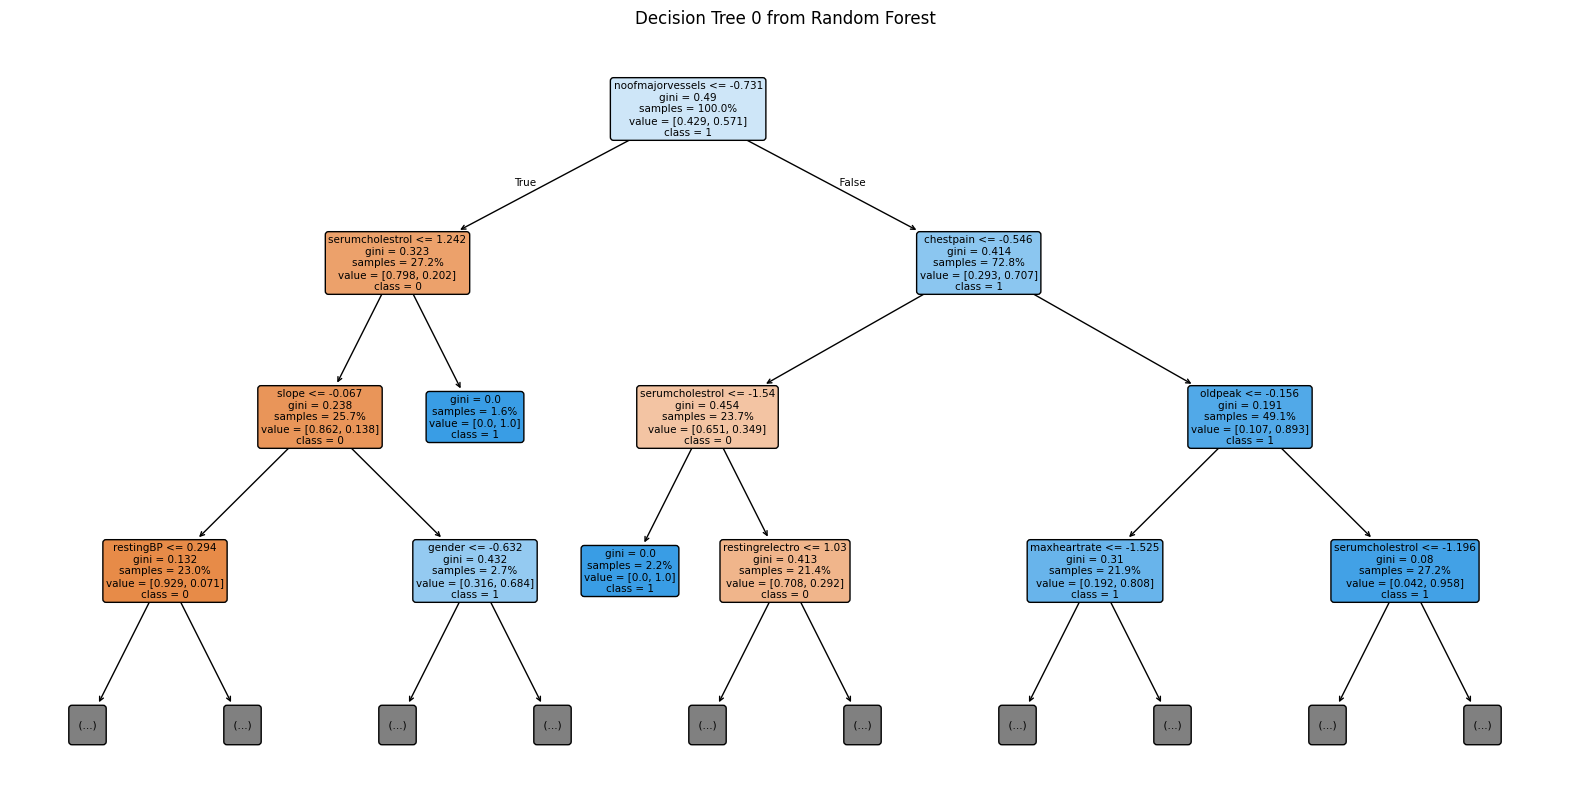

Tuned Model Accuracy: 0.98
Predictions for the test set:
[1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1
 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0]
Confusion Matrix:
[[ 82   4]
 [  5 109]]


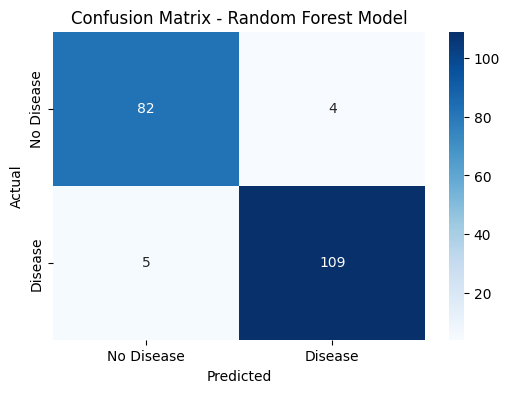

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        86
           1       0.96      0.96      0.96       114

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200

Error Rate: 0.06999999999999995


['rf_CVD.pkl']

In [39]:
"""# ***RANDOM FOREST***"""

# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=10)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_ # Assigning best_rf before using it

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on your dataset
rf_classifier.fit(X_train, y_train)

# Define tree_index before using it
tree_index = 0  # Choose the index of the tree to visualize (e.g., the first tree)

# This part is moved down. We assign the best estimator to the variable best_rf first before trying to call it.
# Visualize one of the trees in the Random Forest
plt.figure(figsize=(20, 10))
#tree_index = 0  # Choose the index of the tree to visualize (e.g., the first tree) # Already defined above
plot_tree(best_rf.estimators_[tree_index], # Changed rf_classifier to best_rf
          feature_names=X.columns,
          class_names=[str(c) for c in best_rf.classes_], # Changed rf_classifier to best_rf
          filled=True,
          rounded=True,
          proportion=True,
          max_depth=3)  # Limit depth for better visualization
plt.title(f"Decision Tree {tree_index} from Random Forest")
plt.show()


y_pred_best = best_rf.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Tuned Model Accuracy: {accuracy_best:.2f}')

# Print the predictions (0 or 1)
print("Predictions for the test set:")
print(y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Error rate analysis
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Save model
joblib.dump(best_rf, 'rf_CVD.pkl')

In [45]:
#apply ensemble learning  combining all 6 models(,also include boosting algorithms)

from sklearn.ensemble import VotingClassifier

# Initialize the models
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
svm_model = SVC()  # Assuming you have already defined and trained svm_model
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# Fit the models before including them in the ensemble
lr_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
nb_model.fit(X_train_scaled, y_train)  # Consider scaling for Naive Bayes
dt_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)


# Create a list of your trained models (estimators)
estimators = [
    ('logistic_regression', lr_model),
    ('knn', knn_model),
    ('svm', svm_model),
    ('naive_bayes', nb_model),
    ('decision_tree', dt_model),
    ('random_forest', rf_model),
    ('gradient_boosting', gb_model),
    ('catboost', cb_model)
]

# Create a Voting Classifier using 'hard' voting (majority vote)
ensemble_model = VotingClassifier(estimators=estimators, voting='hard')

# Fit the ensemble model on the training data
ensemble_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate the ensemble model's performance
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Model Accuracy:", accuracy_ensemble)
print(classification_report(y_test, y_pred_ensemble))


Ensemble Model Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        86
           1       0.99      0.98      0.99       114

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200

